<a href="https://colab.research.google.com/github/VyjayantiN/FMML-Projects-Assignments-2023/blob/main/FMML_Module_5_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module 5 Lab 1

# Non Linear Support Vector Machines

```
Module Coordinator : Akshit Garg
```



In [1]:
#Importing the necessary packages
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn import svm

import pandas
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt


The topic of classifier in today's lab, SVMs make for really good linear separators. Let us look at an example which has linearly separable data:

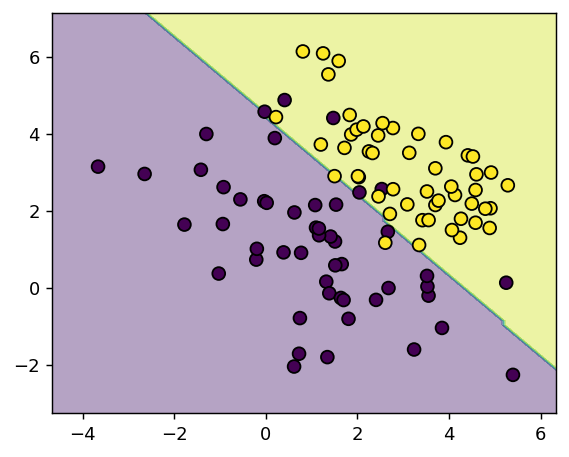

In [2]:
np.random.seed(0)

ar = np.vstack(     [\
                    np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 50, ),\
                    np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 50, )
                    ]\
              )

testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

X = ar
y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

def plotDecisionBoundary(X, y, pair, clf):
  x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
  y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                      np.arange(y_min, y_max, 0.1))

  y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  y_pred = y_pred.reshape(xx.shape)
  plt.figure(figsize=(5,4))
  plt.contourf(xx, yy, y_pred, alpha=0.4)
  plt.scatter(X[:, pair[0]], X[:, pair[1]], c = y, s = 50, edgecolor='k')
  # plt.legend()
  plt.gcf().set_dpi(130)
  plt.show()

def boundaryExp() :
  clf = svm.LinearSVC()
  pair = [0, 1]
  clf.fit(X[:, pair], y)
  plotDecisionBoundary(X, y, pair, clf)

  plt.show()

boundaryExp()

# The Kernel Trick

The true potential of SVMs is unleashed when they are combined with kernels.

## Kernels : An intuitive explanation

Kernel methods are essentially counting on using the training data (say $i^{th}$ example $(x_i, y_i)$ ) itself in a more straightforward way and learning a corresponding weight ($w_i$) for that example. Rather than trying to learn a fixed set of parameters which is done typically.
Depending on the kind of kernel used, we can virtually project the training data in a higher dimension to make it easier for the classifier to classify them.


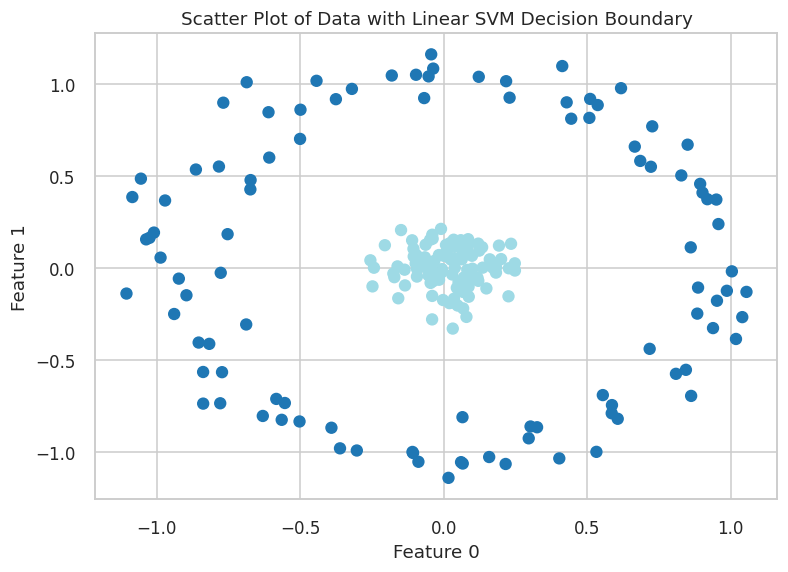

In [31]:
from sklearn.datasets import make_circles
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm

X, y = make_circles(200, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

# Use seaborn to set the style
sns.set(style="whitegrid")

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='tab20')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('Scatter Plot of Data with Linear SVM Decision Boundary')
plt.gcf().set_dpi(110)
plt.show()


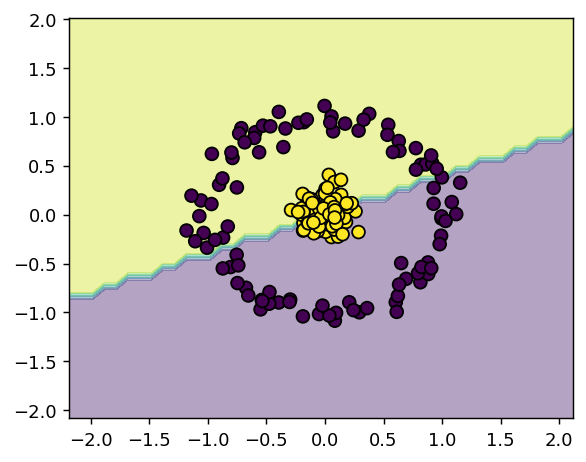

In [4]:
plt.style.use("default")
clf = svm.LinearSVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

However, if we artificially add another dimention to the dataset of the form:

$z = x^2 + y^2$
we can clearly see a hyperplane that can distinguish both the datasets:

In [5]:
Z = np.array([[i[0]**2 + i[1]**2] for i in X])

In [6]:
X_new = np.hstack((X, Z))

In [7]:
import plotly.graph_objects as go


In [8]:
fig = go.Figure(data = [go.Scatter3d(
    x = X_new[:, 0],
    y = X_new[:, 1],
    z = X_new[:, 2],
    mode = "markers",
    marker = {
        "color" : y,
        "line": {"width" : 4, "color":'DarkSlateGrey'},
        "colorscale": "viridis"},
)])

fig.show()

That simple trick has helped us to get another dimension in which the data is linearly separable by a hyperplane (in this case, a 2d plane)

---

Now let us use the rbf kernel and use an SVM Classifier.

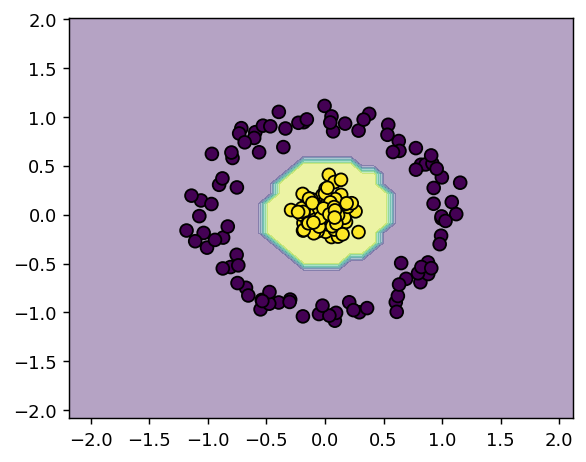

In [9]:
plt.style.use("default")
clf = svm.SVC()
pair = [0, 1]
clf.fit(X[:, pair], y)
plotDecisionBoundary(X, y, [0, 1], clf)

Now let us get back to our original dataset of iris and see if this kernel trick has helped us:

In [10]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy of the decision tree on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

Accuracy of the decision tree on the test set: 

0.974




Certainly, using a kernel has increased our accuracy on the iris dataset.

Things to try out:
- Try to run the same experiment after filtering different features, 2 at a time.
- Using different kinds of kernels for the SVM among: {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

# **ANSWERS**

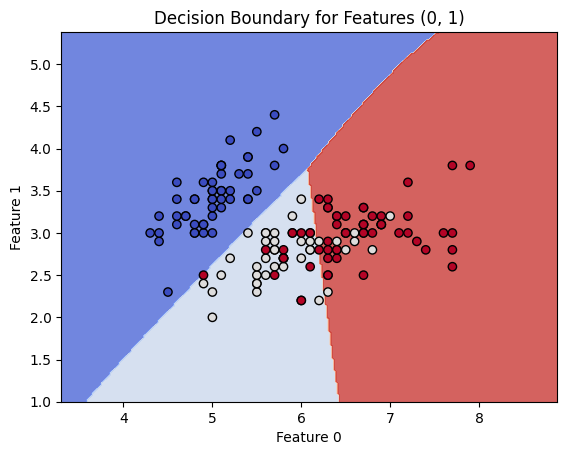

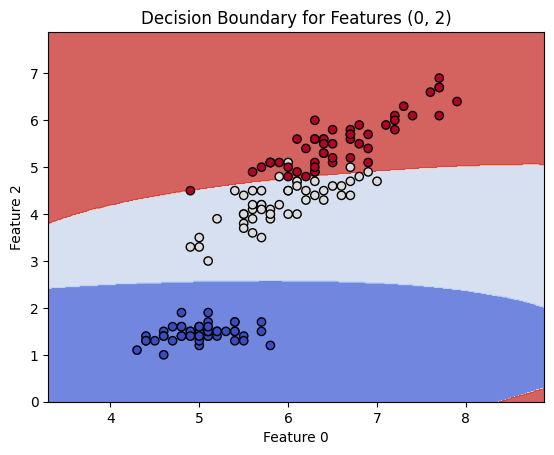

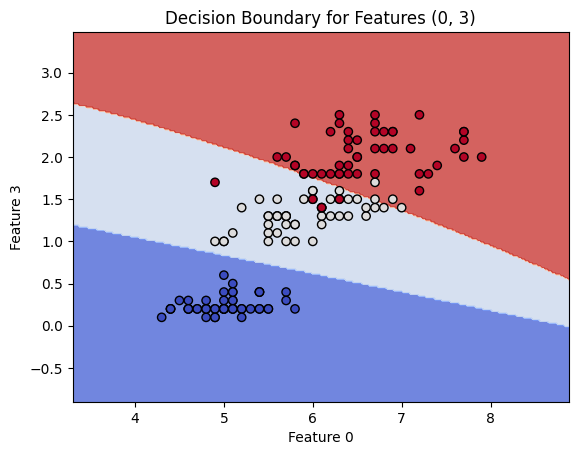

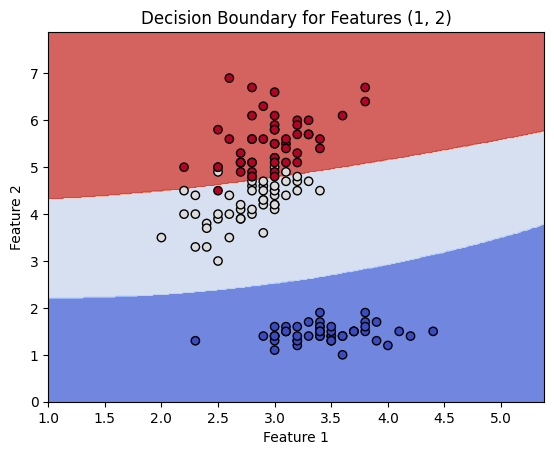

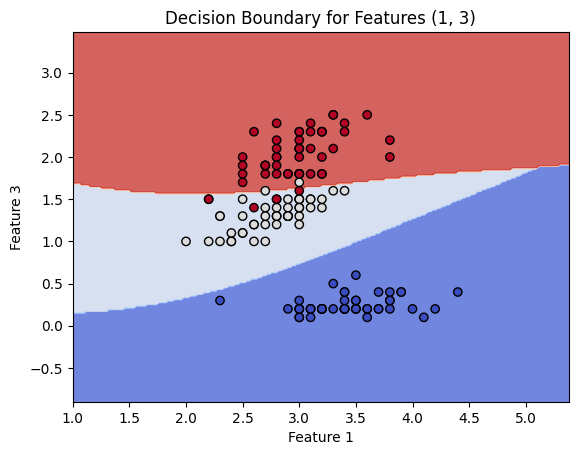

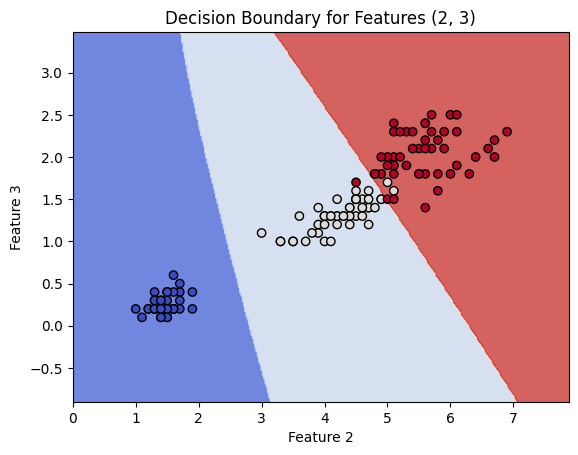

In [24]:
import matplotlib.pyplot as plt
from itertools import combinations

# Function to run SVM experiment with different feature pairs and plot decision boundaries
def run_and_plot_feature_experiment(features_X, labels_y, feature_pair):
    X_pair = features_X[:, feature_pair]
    X_train, X_test, y_train, y_test = train_test_split(X_pair, labels_y, random_state=0)

    clf = svm.SVC()
    clf.fit(X_train, y_train)

    h = .02  # Step size in the mesh
    x_min, x_max = X_pair[:, 0].min() - 1, X_pair[:, 0].max() + 1
    y_min, y_max = X_pair[:, 1].min() - 1, X_pair[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the training points
    plt.scatter(X_pair[:, 0], X_pair[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    plt.xlabel(f'Feature {feature_pair[0]}')
    plt.ylabel(f'Feature {feature_pair[1]}')
    plt.title(f'Decision Boundary for Features {feature_pair}')
    plt.show()

# Get all possible combinations of feature pairs
all_feature_pairs = list(combinations(range(X.shape[1]), 2))

# Running the experiment and plotting decision boundaries for different feature pairs
for feature_pair in all_feature_pairs:
    run_and_plot_feature_experiment(X, y, feature_pair)


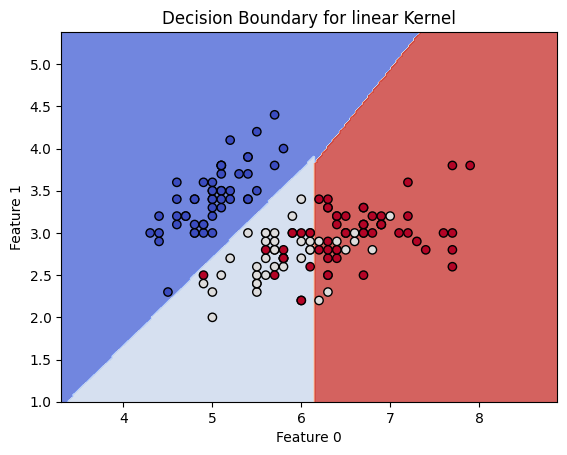

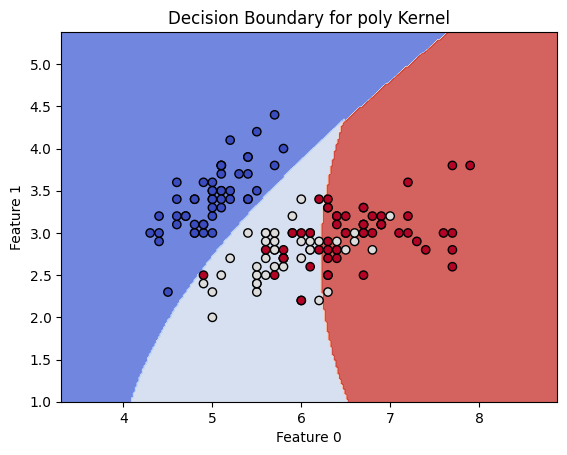

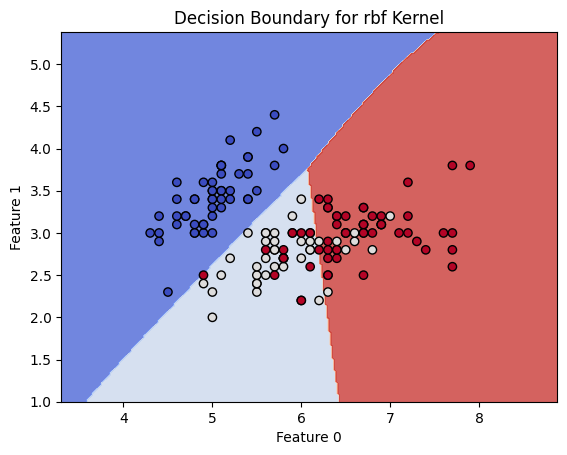

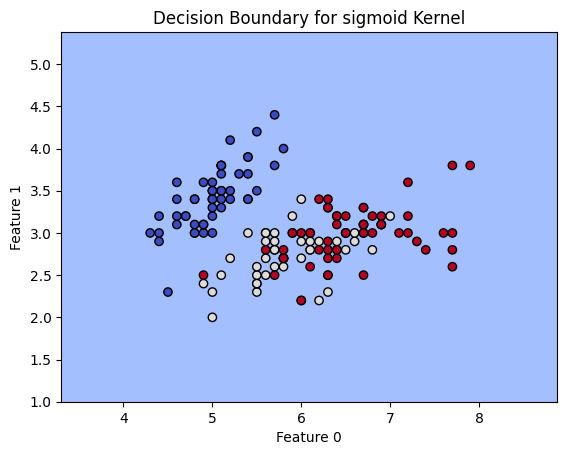

In [28]:
from sklearn.datasets import load_iris
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Load the iris dataset
iris = load_iris()
X, y = iris.data[:, :2], iris.target  # Using only the first two features for visualization

# Function to run SVM experiment with different kernels and plot decision boundaries
def run_and_plot_kernel_experiment(features_X, labels_y, kernel_type):
    X_train, X_test, y_train, y_test = train_test_split(features_X, labels_y, random_state=0)

    clf = svm.SVC(kernel=kernel_type)
    clf.fit(X_train, y_train)

    h = .02  # Step size in the mesh
    x_min, x_max = features_X[:, 0].min() - 1, features_X[:, 0].max() + 1
    y_min, y_max = features_X[:, 1].min() - 1, features_X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the training points
    plt.scatter(features_X[:, 0], features_X[:, 1], c=labels_y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title(f'Decision Boundary for {kernel_type} Kernel')
    plt.show()

# Running the experiment with different kernels and plotting decision boundaries
kernel_types_to_try = ['linear', 'poly', 'rbf', 'sigmoid']

for kernel_type in kernel_types_to_try:
    run_and_plot_kernel_experiment(X, y, kernel_type)


Accuracy with precomputed kernel: 0.974


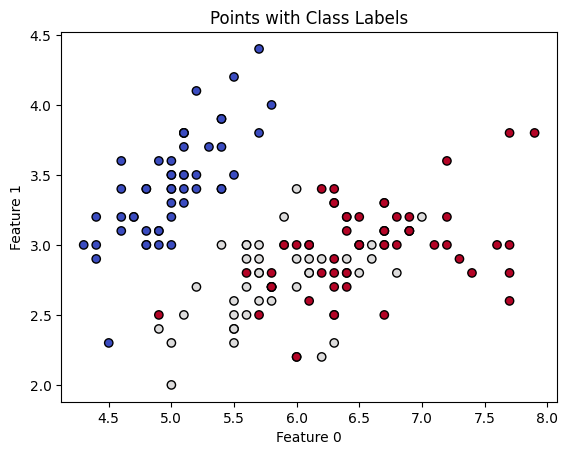

In [25]:
from sklearn.metrics.pairwise import rbf_kernel

# Function to run SVM experiment with precomputed kernel
def run_precomputed_kernel_experiment(features_X, labels_y):
    X_train, X_test, y_train, y_test = train_test_split(features_X, labels_y, random_state=0)

    # Calculate the RBF kernel matrix
    kernel_matrix_train = rbf_kernel(X_train, X_train)
    kernel_matrix_test = rbf_kernel(X_test, X_train)

    clf = svm.SVC(kernel='precomputed')
    clf.fit(kernel_matrix_train, y_train)

    y_pred = clf.predict(kernel_matrix_test)

    accuracy = accuracy_score(y_pred, y_test)
    print(f"Accuracy with precomputed kernel: {accuracy:.3f}")

# Running the experiment with precomputed kernel
run_precomputed_kernel_experiment(X, y)

# Function to plot points based on their class labels
def plot_points_with_labels(features_X, labels_y):
    plt.scatter(features_X[:, 0], features_X[:, 1], c=labels_y, cmap=plt.cm.coolwarm, edgecolors='k', marker='o')
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title('Points with Class Labels')
    plt.show()

# Plotting the points with class labels for the original dataset
plot_points_with_labels(X, y)

